In [7]:
from evaluate import *

In [8]:
base_folder = "Output/Reproduce_new"

# 4.2.1

In [9]:
for loss in ["Masked_MSELoss", "Masked_AreaWeightedMSELoss"]:
    for use_coord_conv in [True, False]:
        for use_cylindrical_padding in [True, False]:
            conditions = {
                "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                                 "prec": ["prec"]},
                                        "GRID_TYPE": "Flat",
                                        "PRECIP_WEIGHTING" : False
                                       },
                "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                              "USE_COORD_CONV": use_coord_conv,
                                              "USE_CYLINDRICAL_PADDING": use_cylindrical_padding,
                                              "LOSS": loss,
                                              "LEARNING_RATE": 5e-3,
                                              "DEPTH": 3,
                                               "FMAPS": (32,32,64,64)
                                              }
            }
            descriptions, predictions, gt, masks = load_data_for_comparison(base_folder, conditions)
            r2 = np.zeros(len(predictions))
            for i in range(len(predictions)):
                r2[i] = get_weighted_average(get_r2(predictions[i], gt[i]), descriptions[i]["DATASET_DESCRIPTION"])
            print('Loss: {}, CoordConv: {}, CylindricalPadding: {}, R2 = {:.3f} +/- {:.3f}'.format(loss, use_coord_conv, use_cylindrical_padding, np.mean(r2), np.std(r2)))

10 matching runs found
Loss: Masked_MSELoss, CoordConv: True, CylindricalPadding: True, R2 = 0.228 +/- 0.003
10 matching runs found
Loss: Masked_MSELoss, CoordConv: True, CylindricalPadding: False, R2 = 0.223 +/- 0.006
10 matching runs found
Loss: Masked_MSELoss, CoordConv: False, CylindricalPadding: True, R2 = 0.217 +/- 0.009
10 matching runs found
Loss: Masked_MSELoss, CoordConv: False, CylindricalPadding: False, R2 = 0.213 +/- 0.010
10 matching runs found
Loss: Masked_AreaWeightedMSELoss, CoordConv: True, CylindricalPadding: True, R2 = 0.230 +/- 0.004
10 matching runs found
Loss: Masked_AreaWeightedMSELoss, CoordConv: True, CylindricalPadding: False, R2 = 0.230 +/- 0.003
10 matching runs found
Loss: Masked_AreaWeightedMSELoss, CoordConv: False, CylindricalPadding: True, R2 = 0.223 +/- 0.003
10 matching runs found
Loss: Masked_AreaWeightedMSELoss, CoordConv: False, CylindricalPadding: False, R2 = 0.222 +/- 0.003


# 4.2.2

TODO Interpolations: Requires cdo.

Flat grid:

In [17]:
linreg_baseline_c = {
    "DATASET_DESCRIPTION": {},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "LinReg_Pixelwise"}
}

randomforest_baseline_c = {
    "DATASET_DESCRIPTION": {},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "RandomForest_Pixelwise"}
}

pca_baseline_c = {
    "DATASET_DESCRIPTION": {},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "PCA_Flat",
                                  "REGTYPE": "linreg"}
}

unet_unmodified_c = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                                 "prec": ["prec"]},
                                        "PRECIP_WEIGHTING" : False
                                       },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": False,
                                  "USE_CYLINDRICAL_PADDING": False,
                                  "LEARNING_RATE": 5e-3,                                   
                                  "LOSS": "Masked_MSELoss"}
}

unet_modified_c = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                                        "PRECIP_WEIGHTING" : False,
                                        "GRID_TYPE": "Flat"
                                       },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LEARNING_RATE": 5e-3,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "DEPTH": 3,
                                  "FMAPS": (32,32,64,64)}
}


In [18]:

descriptions_u_u, predictions_u_u, gt_u_u, masks_u_u = load_data_for_comparison(base_folder, unet_unmodified_c)
descriptions_m_u, predictions_m_u, gt_m_u, masks_m_u = load_data_for_comparison(base_folder, unet_modified_c)
descriptions_rf, predictions_rf, gt_rf, masks_rf = load_data_for_comparison(base_folder, randomforest_baseline_c)

descriptions_lr, predictions_lr, gt_lr, masks_lr = load_data_for_comparison(base_folder, linreg_baseline_c)
descriptions_pca, predictions_pca, gt_pca, masks_pca = load_data_for_comparison(base_folder, pca_baseline_c)


r2_u_u = np.zeros(len(predictions_u_u))
r2_m_u = np.zeros(len(predictions_m_u))
r2_rf = np.zeros(len(predictions_rf))

r2_lr = np.zeros(len(predictions_lr))
r2_pca = np.zeros(len(predictions_pca))


for i in range(len(predictions_u_u)):
    r2_u_u[i] = get_weighted_average(get_r2(predictions_u_u[i], gt_u_u[i]), descriptions_u_u[i]["DATASET_DESCRIPTION"])

for i in range(len(predictions_m_u)):
    r2_m_u[i] = get_weighted_average(get_r2(predictions_m_u[i], gt_m_u[i]), descriptions_m_u[i]["DATASET_DESCRIPTION"])
    
for i in range(len(predictions_rf)):
    r2_rf[i] = get_weighted_average(get_r2(predictions_rf[i], gt_rf[i]), descriptions_rf[i]["DATASET_DESCRIPTION"])
    
for i in range(len(predictions_lr)):
    r2_lr[i] = get_weighted_average(get_r2(predictions_lr[i], gt_lr[i]), descriptions_lr[i]["DATASET_DESCRIPTION"])
    
for i in range(len(predictions_pca)):
    r2_pca[i] = get_weighted_average(get_r2(predictions_pca[i], gt_pca[i]), descriptions_pca[i]["DATASET_DESCRIPTION"])


print(r"Unmodified UNet: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_u_u), np.std(r2_u_u)))
print(r"Modified UNet: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_m_u), np.std(r2_m_u)))
print(r"Random Forest: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_rf), np.std(r2_rf)))

print(r"Pixelwise Linear regression: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_lr), np.std(r2_lr)))
print(r"PCA Regression: $R2 = {:.3f} \pm {:.3f}$".format(np.mean(r2_pca), np.std(r2_pca)))

10 matching runs found
10 matching runs found
0 matching runs found
0 matching runs found
0 matching runs found
Unmodified UNet: $R2 = 0.213 \pm 0.010$
Modified UNet: $R2 = 0.230 \pm 0.004$
Random Forest: $R2 = nan \pm nan$
Pixelwise Linear regression: $R2 = nan \pm nan$
PCA Regression: $R2 = nan \pm nan$


/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype

icosahedral grid:

In [19]:
ico_baseline_c = {
    "DATASET_DESCRIPTION": {},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "PCA_Ico",
                                  "REGTYPE": "linreg"}
}

ico_unet_c = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                                 "prec": ["prec"]},
                                        "PRECIP_WEIGHTING" : False
                                       },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Ico"}
}

In [20]:
descriptions_ico_unet, predictions_ico_unet, gt_ico_unet, masks_ico_unet = load_data_for_comparison(base_folder, ico_unet_c)
descriptions_ico_bl, predictions_ico_bl, gt_ico_bl, masks_ico_bl = load_data_for_comparison(base_folder, ico_baseline_c)

r2_ico_unet = np.zeros(len(predictions_ico_unet))
r2_ico_bl = np.zeros(len(predictions_ico_bl))

for i in range(len(predictions_ico_unet)):
    r2_ico_unet[i] = np.mean(get_r2(predictions_ico_unet[i], gt_ico_unet[i]), axis=(1,2))

for i in range(len(predictions_ico_bl)):
    r2_ico_bl[i] = np.mean(get_r2(predictions_ico_bl[i], gt_ico_bl[i]), axis=(1,2))
    
print('Ico Unet: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_ico_unet), np.std(r2_ico_unet)))
print('Ico Baseline: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_ico_bl), np.std(r2_ico_bl)))

10 matching runs found
1 matching runs found
Ico Unet: R2 = 0.243 \pm 0.006
Ico Baseline: R2 = 0.202 \pm 0.000


# 4.2.3

In [22]:
# predictor variables:
conditions_tas = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  }
}

conditions_pr = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"prec": ["prec"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  }
}

conditions_slp = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"slp": ["p"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  }
}

conditions_tps = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"],
                                                     "slp": ["p"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "LEARNING_RATE": 5e-3,
                                  "DEPTH": 3,
                                   "FMAPS": (32,32,64,64)
                                  }
}

conditions_tpo = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"],
                                                     "oro": ["ht"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  }
}

descriptions_tas, predictions_tas, gt_tas, masks_tas = load_data_for_comparison(base_folder, conditions_tas)
descriptions_pr, predictions_pr, gt_pr, masks_pr = load_data_for_comparison(base_folder, conditions_pr)
descriptions_slp, predictions_slp, gt_slp, masks_slp = load_data_for_comparison(base_folder, conditions_slp)
descriptions_tps, predictions_tps, gt_tps, masks_tps = load_data_for_comparison(base_folder, conditions_tps)
descriptions_tpo, predictions_tpo, gt_tpo, masks_tpo = load_data_for_comparison(base_folder, conditions_tpo)

r2_tas = np.zeros(len(predictions_tas))
r2_pr = np.zeros(len(predictions_pr))
r2_slp = np.zeros(len(predictions_slp))
r2_tps = np.zeros(len(predictions_tps))
r2_tpo = np.zeros(len(predictions_tpo))

for i in range(len(predictions_tas)):
    r2_tas[i] = get_weighted_average(get_r2(predictions_tas[i], gt_tas[i]), descriptions_tas[i]["DATASET_DESCRIPTION"])

for i in range(len(predictions_pr)):
    r2_pr[i] = get_weighted_average(get_r2(predictions_pr[i], gt_pr[i]), descriptions_pr[i]["DATASET_DESCRIPTION"])
    
for i in range(len(predictions_slp)):
    r2_slp[i] = get_weighted_average(get_r2(predictions_slp[i], gt_slp[i]), descriptions_slp[i]["DATASET_DESCRIPTION"])
    
for i in range(len(predictions_tps)):
    r2_tps[i] = get_weighted_average(get_r2(predictions_tps[i], gt_tps[i]), descriptions_tps[i]["DATASET_DESCRIPTION"])
    
for i in range(len(predictions_tpo)):
    r2_tpo[i] = get_weighted_average(get_r2(predictions_tpo[i], gt_tpo[i]), descriptions_tpo[i]["DATASET_DESCRIPTION"])
    
print('Tas: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_tas), np.std(r2_tas)))
print('Precip: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_pr), np.std(r2_pr)))
print('Slp: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_slp), np.std(r2_slp)))
print('Tas, precip, slp: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_tps), np.std(r2_tps)))
print('Tas, precip, oro: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_tpo), np.std(r2_tpo)))

0 matching runs found
0 matching runs found
0 matching runs found
0 matching runs found
0 matching runs found
Tas: R2 = nan \pm nan
Precip: R2 = nan \pm nan
Slp: R2 = nan \pm nan
Tas, precip, slp: R2 = nan \pm nan
Tas, precip, oro: R2 = nan \pm nan


# 4.2.4

In [23]:
conditions_wider = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"],
                                                     "slp": ["p"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "LEARNING_RATE": 5e-3,
                                  "DEPTH": 3,
                                   "FMAPS": (64,64,128,128)
                                  }
}

conditions_deeper = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"],
                                                     "slp": ["p"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "LEARNING_RATE": 5e-3,
                                  "DEPTH": 4
                                  }
}

descriptions_deeper, predictions_deeper, gt_deeper, masks_deeper = load_data_for_comparison(base_folder, conditions_deeper)
descriptions_wider, predictions_wider, gt_wider, masks_wider = load_data_for_comparison(base_folder, conditions_wider)

r2_deeper = np.zeros(len(predictions_deeper))
r2_wider = np.zeros(len(predictions_wider))

for i in range(len(predictions_deeper)):
    r2_deeper[i] = get_weighted_average(get_r2(predictions_deeper[i], gt_deeper[i]), descriptions_deeper[i]["DATASET_DESCRIPTION"])

for i in range(len(predictions_wider)):
    r2_wider[i] = get_weighted_average(get_r2(predictions_wider[i], gt_wider[i]), descriptions_wider[i]["DATASET_DESCRIPTION"])
    
print('Deeper: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_deeper), np.std(r2_deeper)))
print('Wider: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_wider), np.std(r2_wider)))

0 matching runs found
0 matching runs found
Deeper: R2 = nan \pm nan
Wider: R2 = nan \pm nan


learning rate tuning:

In [24]:
conditions_lrs = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"],
                                                     "slp": ["p"]},
                            "PRECIP_WEIGHTING" : False
                           },
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "DEPTH": 3
                                  }
}

descriptions_lrs, predictions_lrs, gt_lrs, masks_lrs = load_data_for_comparison(base_folder, conditions_lrs)

0 matching runs found


In [25]:
r2_lrs = np.zeros(len(predictions_lrs))

for i in range(len(predictions_lrs)):
    r2_lrs[i] = get_weighted_average(get_r2(predictions_lrs[i], gt_lrs[i]), descriptions_lrs[i]["DATASET_DESCRIPTION"])

lr: 0.0001 R2 = nan \pm nan
lr: 0.0001438449888287663 R2 = nan \pm nan
lr: 0.00020691380811147902 R2 = nan \pm nan
lr: 0.00029763514416313193 R2 = nan \pm nan
lr: 0.00042813323987193956 R2 = nan \pm nan
lr: 0.0006158482110660267 R2 = nan \pm nan
lr: 0.0008858667904100823 R2 = nan \pm nan
lr: 0.0012742749857031334 R2 = nan \pm nan
lr: 0.0018329807108324356 R2 = nan \pm nan
lr: 0.0026366508987303583 R2 = nan \pm nan
lr: 0.00379269019073225 R2 = nan \pm nan
lr: 0.005455594781168515 R2 = nan \pm nan
lr: 0.007847599703514606 R2 = nan \pm nan
lr: 0.011288378916846883 R2 = nan \pm nan
lr: 0.01623776739188721 R2 = nan \pm nan
lr: 0.023357214690901212 R2 = nan \pm nan
lr: 0.03359818286283781 R2 = nan \pm nan
lr: 0.04832930238571752 R2 = nan \pm nan
lr: 0.06951927961775606 R2 = nan \pm nan
lr: 0.1 R2 = nan \pm nan


/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/ldap-server/firenze/venv/GrouPyTorch/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype

Text(0, 0.5, 'R2 score')

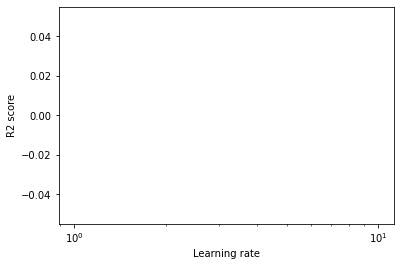

In [26]:
import matplotlib.pyplot as plt
lrs = [d["MODEL_TRAINING_DESCRIPTION"]["LEARNING_RATE"] for d in descriptions_lrs]

r2_lrs_mean = []
r2_lrs_std = []

ls = np.logspace(-4,-1,20)
for i, l in enumerate(ls):
    indices = np.where(l==lrs)[0]
    print('lr: {} R2 = {:.3f} \pm {:.3f}'.format(l, np.mean(r2_lrs[indices]), np.std(r2_lrs[indices])))
    r2_lrs_mean.append(np.mean(r2_lrs[indices]))
    r2_lrs_std.append(np.std(r2_lrs[indices]))
    
plt.plot(ls, r2_lrs_mean)
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("R2 score")

# A.3 Precip weighting

In [29]:
conditions_pw = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING" : True},
    "MODEL_TRAINING_DESCRIPTION": {}
}

conditions_no_pw = {
    "DATASET_DESCRIPTION": {"PREDICTOR_VARIABLES" : {"tsurf": ["tsurf"],
                                                     "prec": ["prec"]},
                            "PRECIP_WEIGHTING" : False,
                            "GRID_TYPE": "Flat"},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",
                                  "USE_COORD_CONV": True,
                                  "USE_CYLINDRICAL_PADDING": True,
                                  "LOSS": "Masked_AreaWeightedMSELoss",
                                  "LEARNING_RATE": 5e-3,
                                  "DEPTH": 3,
                                  "FMAPS": (32,32,64,64)
                                  }
}

descriptions_pw, predictions_pw, gt_pw, masks_pw = load_data_for_comparison(base_folder, conditions_pw)
descriptions_no_pw, predictions_no_pw, gt_no_pw, masks_no_pw = load_data_for_comparison(base_folder, conditions_no_pw)

r2_pw = np.zeros(len(predictions_pw))
r2_no_pw = np.zeros(len(predictions_no_pw))

for i in range(len(predictions_pw)):
    r2_pw[i] = get_weighted_average(get_r2(predictions_pw[i], gt_pw[i]), descriptions_pw[i]["DATASET_DESCRIPTION"])

for i in range(len(predictions_no_pw)):
    r2_no_pw[i] = get_weighted_average(get_r2(predictions_no_pw[i], gt_no_pw[i]), descriptions_no_pw[i]["DATASET_DESCRIPTION"])
    
print('No precip weighting: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_no_pw), np.std(r2_no_pw)))
print('Precip weighting: R2 = {:.3f} \pm {:.3f}'.format(np.mean(r2_pw), np.std(r2_pw)))

10 matching runs found
10 matching runs found
No precip weighting: R2 = 0.230 \pm 0.004
Precip weighting: R2 = 0.252 \pm 0.003
